In [ ]:
import pandas as pd
pd.__version__

'1.5.3'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to the dataset

Note:
1. Load the datasets
2. rows, columns
3. merge the datasets into a single data frame
4. count the number of null values and remove the records from analysis
5. Check the types and memory usage
6. Use the right types and check the new memory

In [ ]:
def q1():
    df1 = pd.read_csv('cof_main_1.csv')
    df2 = pd.read_csv('cof_main_2.csv')
    df = df1.merge(df2, on='url')
    print("the number of null values",sum(df.isnull().values.ravel()))
    df.dropna(inplace=True)
    print('Memory Type')
    print(df.dtypes)
    print('Memory Usages Before')
    print(df.memory_usage(deep=True).sum())
    df['film_date'] = pd.to_datetime(df['film_date'], unit='s', errors='coerce')
    df['published_date'] = pd.to_datetime(df['published_date'], unit='s', errors='coerce')

    df['languages'] = df['languages'].astype(int)
    df['num_speaker'] = df['num_speaker'].astype(int)
    df['comments'] = df['comments'].astype(int)
    df['views'] = df['views'].astype(int)

    print('Memory Usages After')
    print(df.memory_usage(deep=True).sum())

    return df
df = q1()

the number of null values 157
Memory Type
duration              float64
event                  object
film_date              object
languages             float64
main_speaker           object
name                   object
num_speaker           float64
published_date         object
ratings                object
related_talks          object
speaker_occupation     object
tags                   object
title                  object
url                    object
description            object
comments              float64
views                 float64
transcript             object
dtype: object
Memory Usages Before
62484372
Memory Usages After
62201530


## 2. Which talks provoke the most online discussion?

Notes:
1. sort by the number of first-level comments, though this is biased in favor of older talks
2. correct for this bias by calculating the number of view per comments  

In [ ]:
def q2(df):
    df_sorted_comments = df.sort_values(by='comments', ascending=False)
    df_sorted_comments['views_per_comment'] = df_sorted_comments['views'] / df_sorted_comments['comments']
    print(df_sorted_comments[['title', 'comments', 'views', 'views_per_comment']])
    return df_sorted_comments
df_new = q2(df.copy())

                                                  title  comments     views  \
0                           Do schools kill creativity?      4553  47227110   
644                  Science can answer moral questions      3356   3433437   
201                                My stroke of insight      2877  21190883   
1790                  How do you explain consciousness?      2673   2162764   
954                        Taking imagination seriously      2492   1832930   
...                                                 ...       ...       ...   
2395  Smelfies, and other experiments in synthetic b...         6    760537   
2531    How your pictures can help reclaim lost history         3    539207   
2545  Living sculptures that stand for history's truths         3    542088   
2504  The stories behind The New Yorker's iconic covers         3    839040   
2537         What it feels like to see Earth from space         2    646174   

      views_per_comment  
0          10372.745443  

## 3. Visualize the distribution of comments

Notes:
1. show the frequency distribution of comments using both histogram and box plots


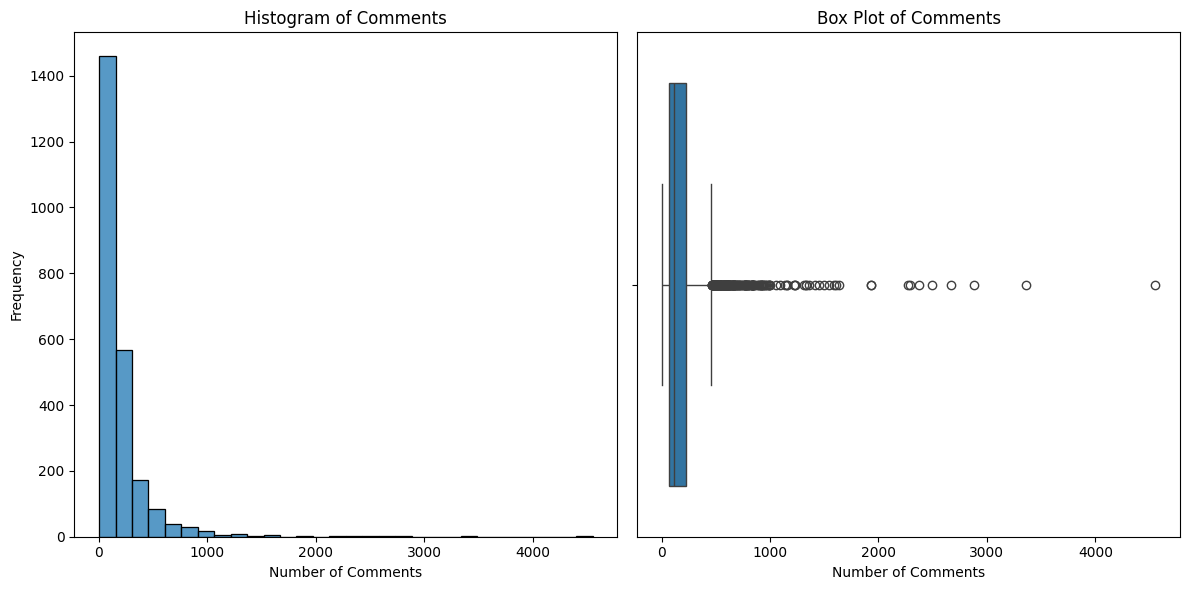

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def q3(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(df['comments'], bins=30, kde=False, ax=ax1)
    ax1.set_title('Histogram of Comments')
    ax1.set_xlabel('Number of Comments')
    ax1.set_ylabel('Frequency')

    sns.boxplot(x=df['comments'], ax=ax2)
    ax2.set_title('Box Plot of Comments')
    ax2.set_xlabel('Number of Comments')

    plt.tight_layout()
    plt.show()

q3(df.copy())

## 4. Plot the number of talks that took place each year

Bonus exercise: calculate the average delay between filming and publishing

Notes:
1. Convert the film_date column in to datetime
2. Agg and plot a line chart
3. investigate the low number of talks in later years

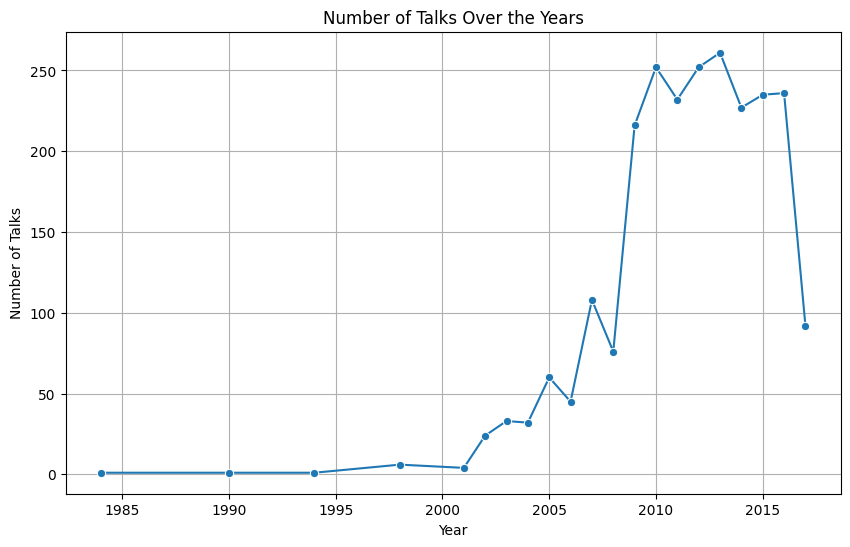

In [ ]:
df['film_date'] = pd.to_datetime(df['film_date'], unit='s')

df['year'] = df['film_date'].dt.year

talks_by_year = df.groupby('year').size().reset_index(name='num_talks')

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='num_talks', data=talks_by_year, marker='o')
plt.title('Number of Talks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Talks')
plt.grid(True)
plt.show()

## 5. What were the "best" events in Conference history to attend?

Notes:
1. count the number of talks
2. Use Views as proxy for quality
3. find the largest values, but we don't know how many talks are being averaged
4. show the number of talks along with the mean
5. calculate the total views per event

In [ ]:
num_talks = df.shape[0]

top_talks = df.nlargest(10, 'views')
mean_views = df['views'].mean()

total_views_per_event = df.groupby('event')['views'].sum().reset_index(name='total_views_per_event')

print(f"Number of Talks: {num_talks}")
print("\nTop Talks:")
print(top_talks[['title', 'views']])
print(f"\nMean Views: {mean_views:.2f}")

print("\nTotal Views Per Event:")
print(total_views_per_event)

Number of Talks: 2397

Top Talks:
                                                  title     views
0                           Do schools kill creativity?  47227110
1349           Your body language may shape who you are  43155405
677                    How great leaders inspire action  34309432
837                          The power of vulnerability  31168150
452              10 things you didn't know about orgasm  22270883
1779         How to speak so that people want to listen  21594632
201                                My stroke of insight  21190883
5                                  Why we do what we do  20685401
2117  This is what happens when you reply to spam email  20475972
1419  Looks aren't everything. Believe me, I'm a model.  19787465

Mean Views: 1751246.57

Total Views Per Event:
                           event  total_views_per_event
0             Arbejdsglaede Live                 971594
1    Business Innovation Factory                 757560
2               COF Fell

## 6. Unpack the ratings data

Notes:
1. Convert the data type of ratings into appropriate type
2. define a function to convert an element in the ratings Series from string to list

Lessons:

1. Pay attention to data types in pandas
2. Use apply any time it is necessary

In [ ]:
import ast

def q6(df):
    df['ratings'] = df['ratings'].apply(ast.literal_eval)

    print(df.info())
    return df

df_new2 = q6(df.copy())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2397 entries, 0 to 2552
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   duration            2397 non-null   float64       
 1   event               2397 non-null   object        
 2   film_date           2394 non-null   datetime64[ns]
 3   languages           2397 non-null   int64         
 4   main_speaker        2397 non-null   object        
 5   name                2397 non-null   object        
 6   num_speaker         2397 non-null   int64         
 7   published_date      2395 non-null   datetime64[ns]
 8   ratings             2397 non-null   object        
 9   related_talks       2397 non-null   object        
 10  speaker_occupation  2397 non-null   object        
 11  tags                2397 non-null   object        
 12  title               2397 non-null   object        
 13  url                 2397 non-null   object      

## 7. Count the total number of ratings received by each talk

Bonus exercises:

- for each talk, calculate the percentage of ratings that were negative
- for each talk, calculate the average number of ratings it received per day since it was published

Notes:
1. expected result (for each talk) is sum of count
2. write a fucntion that will take the list and return the count

In [ ]:
def calculate_negative_percentage(ratings):
    if not ratings:
        return 0.0
    negative_count = sum(1 for rating in ratings if rating['name'] == 'Negative')
    total_count = len(ratings)
    return (negative_count / total_count) * 100

def calculate_avg_ratings_per_day(row):
    if pd.isnull(row['published_date']):
        return 0.0
    days_since_published = (row['published_date'] - row['film_date']).days
    if days_since_published == 0:
        return 0.0
    return row['num_ratings'] / days_since_published

def q7(df):
    df['ratings'] = df['ratings'].apply(ast.literal_eval)
    df['negative_percentage'] = df['ratings'].apply(calculate_negative_percentage)
    df['num_ratings'] = df['ratings'].apply(len)
    df['avg_ratings_per_day'] = df.apply(calculate_avg_ratings_per_day, axis=1)

    # Display the relevant columns
    result_df = df[['title', 'negative_percentage', 'avg_ratings_per_day', 'num_ratings']]
    print(result_df)
    return result_df

df_new3 = q7(df.copy())

                                                  title  negative_percentage  \
0                           Do schools kill creativity?                  0.0   
1                           Averting the climate crisis                  0.0   
2                                      Simplicity sells                  0.0   
3                                   Greening the ghetto                  0.0   
4                       The best stats you've ever seen                  0.0   
...                                                 ...                  ...   
2548  What we're missing in the debate about immigra...                  0.0   
2549                    The most Martian place on Earth                  0.0   
2550  What intelligent machines can learn from a sch...                  0.0   
2551       A black man goes undercover in the alt-right                  0.0   
2552  How a video game might help us build better ci...                  0.0   

      avg_ratings_per_day  num_ratings 

## 8. Which occupations deliver the funniest conference talks on average?

Bonus exercises:

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

1. Count the number of funny ratings
2. Calculate the percentage of ratings that are funny
3. Analyze the funny rate by occupation
4. Focus on occupations that are well-represented in the data
5. Re-analyze the funny rate by occupation (for top occupations only)

In [ ]:
from collections import Counter

def most_frequent_rating(ratings):
    if not ratings:
        return None

    rating_names = [rating['name'] if isinstance(rating, dict) and 'name' in rating else rating for rating in ratings]
    rating_counts = Counter(rating_names)
    return max(rating_counts, key=rating_counts.get)

def clean_occupation_data(occupations):
    if not occupations:
        return None
    return occupations[0]

def count_funny_ratings(ratings):
    if not ratings:
        return 0
    return sum(1 for rating in ratings if rating['name'] == 'Funny')

def calculate_funny_percentage(comments, views):
    if views == 0:
        return 0
    return (comments / views) * 100

def q8(df):
  df['ratings'] = df['ratings'].apply(ast.literal_eval)
  df['most_frequent_rating'] = df['ratings'].apply(most_frequent_rating)
  df['cleaned_occupation'] = df['speaker_occupation'].apply(clean_occupation_data)
  df['num_funny_ratings'] = df['ratings'].apply(count_funny_ratings)
  df['funny_percentage'] = df.apply(lambda row: calculate_funny_percentage(row['comments'], row['views']), axis=1)

  # Display the relevant columns
  result_df = df[['title', 'most_frequent_rating', 'cleaned_occupation', 'num_funny_ratings', 'funny_percentage']]
  print(result_df)

  # Focus on well-represented occupations
  top_occupations = df['cleaned_occupation'].value_counts().index[:10]
  filtered_df = df[df['cleaned_occupation'].isin(top_occupations)]

  # Analyze the funny rate by occupation
  occupation_funny_rate = (
      filtered_df.groupby('cleaned_occupation')['funny_percentage']
      .mean()
      .reset_index(name='average_funny_rate')
  )

  print(occupation_funny_rate)

q8(df.copy())

                                                  title most_frequent_rating  \
0                           Do schools kill creativity?                Funny   
1                           Averting the climate crisis                Funny   
2                                      Simplicity sells                Funny   
3                                   Greening the ghetto           Courageous   
4                       The best stats you've ever seen            Ingenious   
...                                                 ...                  ...   
2548  What we're missing in the debate about immigra...           Courageous   
2549                    The most Martian place on Earth          Fascinating   
2550  What intelligent machines can learn from a sch...            Beautiful   
2551       A black man goes undercover in the alt-right           Longwinded   
2552  How a video game might help us build better ci...         Unconvincing   

     cleaned_occupation  num_funny_rati